## Preceding Step - import modules (packages)


This step is necessary in order to use external packages. 



In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
import csv
import os
import warnings

import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from sklearn.cluster import KMeans
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor



from tqdm.notebook import tqdm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter("ignore")

from sklearn import linear_model,metrics,preprocessing
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression# OLS algorithm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score# evaluation metric
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric

from sklearn.model_selection import train_test_split # data split




# Real estate crawling

Get a list of all the pages that contain the real estate data.

Iterate through the list, and download each page individualy.

Parse each page, and extract the data.

In [2]:

# for i in range(1,200):
#     url = f'https://www.ad.co.il/nadlanprice?city=jerusalem,beersheba,ashdod,rishon-lezion,tel-aviv,haifa&pageindex={i}'
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     table = soup.find("table", attrs={"class":'table text-nowrap'})
#     table_rows = table.find_all('tr')
#     if i%10 ==0:
#         print(i)
#     #GET THE DATA FROM THE GIVEN URL
#     res = []
#     for tr in table_rows:
#         td = tr.find_all('td')
#         row = [tr for tr in td if tr]
        
        
#         if len(row) == 9:
#             date.append(row[0])
#             city.append(row[1])
#             street.append(row[2])
#             rooms.append(row[3])
#             size.append(row[4])
#             floor.append(row[5])
#             price.append(row[6])
#             pricePerMeter.append(row[7])
#             buildDate.append(row[8])    
            
#         #PUT EVERY 200 PAGES IN THE DATAFRAME AND THEN TO CSV FILE
#         if i %200 ==0: 
#             df.to_csv("ML.csv",index = False)


## Load the dataset 


In [3]:
df=pd.read_csv("ML.csv")
df

,date,city,street,rooms,size,floor,price,pricePerMeter,buildDate
0,20-01-21,תל אביב יפו,דרך משה דיין 34,5.0,105,6,"2,604,000","24,800",2020
1,20-01-21,תל אביב יפו,שפירא צבי 1,4.0,85,2,"4,000,000","47,058",1940
2,20-01-21,חיפה,כנרת 15,3.0,36,2,"760,000","21,111",1960
3,20-01-21,חיפה,נורדאו 34,3.0,66,2,"850,000","12,878",1930
4,20-01-21,תל אביב יפו,גאולה 14,3.0,76,1,"4,500,000","59,210",2019
...,...,...,...,...,...,...,...,...,...
216029,18-09-05,ירושלים,לויד גורג 13,6.0,140,2,"3,398,250","24,273",1983
216030,18-09-05,ירושלים,ברקת 219,4.0,83,3,"679,650","8,188",1980
216031,18-09-05,ירושלים,בלפור 14,8.5,218,3,"5,085,816","23,329",1930
216032,18-09-05,ירושלים,כובשי קטמון 4,2.0,40,2,"770,270","19,256",1930


Using the info () method to print information on the DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216034 entries, 0 to 216033
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           216034 non-null  object 
 1   city           216034 non-null  object 
 2   street         216034 non-null  object 
 3   rooms          216034 non-null  float64
 4   size           216034 non-null  int64  
 5   floor          216034 non-null  int64  
 6   price          216034 non-null  object 
 7   pricePerMeter  216034 non-null  object 
 8   buildDate      216034 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 14.8+ MB


Renaming the columns from Hebrew to English


In [5]:
df.columns=["date",  "city", "street", "rooms", "size", "floor", "price", "pricePerMeter", "buildDate"]

# Handling the dataframe data


Detecting the missing values in the dataframe.

In [6]:
df.isnull().sum()

date             0
city             0
street           0
rooms            0
size             0
floor            0
price            0
pricePerMeter    0
buildDate        0
dtype: int64

Replace the value in the column with 0 when the value is missing


In [7]:
df['floor'] = df['floor'].fillna(0)


Drop rows when there are missing values


In [8]:
df.dropna(subset = ["rooms"], inplace=True)

Create a copy of the dataframe and his printing 


In [9]:
df_copy=df.copy()
df_copy

,date,city,street,rooms,size,floor,price,pricePerMeter,buildDate
0,20-01-21,תל אביב יפו,דרך משה דיין 34,5.0,105,6,"2,604,000","24,800",2020
1,20-01-21,תל אביב יפו,שפירא צבי 1,4.0,85,2,"4,000,000","47,058",1940
2,20-01-21,חיפה,כנרת 15,3.0,36,2,"760,000","21,111",1960
3,20-01-21,חיפה,נורדאו 34,3.0,66,2,"850,000","12,878",1930
4,20-01-21,תל אביב יפו,גאולה 14,3.0,76,1,"4,500,000","59,210",2019
...,...,...,...,...,...,...,...,...,...
216029,18-09-05,ירושלים,לויד גורג 13,6.0,140,2,"3,398,250","24,273",1983
216030,18-09-05,ירושלים,ברקת 219,4.0,83,3,"679,650","8,188",1980
216031,18-09-05,ירושלים,בלפור 14,8.5,218,3,"5,085,816","23,329",1930
216032,18-09-05,ירושלים,כובשי קטמון 4,2.0,40,2,"770,270","19,256",1930


Column Separation Date for day, month, year.

Leave only the column of the year.

In [10]:

df_copy[["day", "month", "year"]] = df_copy["date"].str.split("-", expand = True)
del df_copy["date"]
del df_copy["day"]
del df_copy["month"]


Adding a "20" string before values in the year column


In [11]:
df_copy['year'] = '20' + df_copy['year'].astype(str)


Deleting commas to price columns to make those columns numeric


In [12]:
df_copy['price'] = df_copy['price'].str.replace(',', '')
df_copy['pricePerMeter'] = df_copy['pricePerMeter'].str.replace(',', '')


Switching cities to numbers


In [13]:
city_nums = {"city": {"תל אביב יפו": 1,  "אשדוד": 6, "חיפה": 2, "ראשון לציון": 3, "באר שבע": 4, "ירושלים": 5}}
df_copy = df_copy.replace(city_nums)

Deleting the street column because it is a column of categorical value

In [14]:
del df_copy["street"]

Replaces these columns with numeric columns


In [15]:
df_copy["pricePerMeter"] = pd.to_numeric(df_copy["pricePerMeter"], downcast='float')
df_copy["price"] = pd.to_numeric(df_copy["price"], downcast='float')
df_copy["year"] = pd.to_numeric(df_copy["year"])
df_copy

,city,rooms,size,floor,price,pricePerMeter,buildDate,year
0,1,5.0,105,6,2604000.0,24800.0,2020,2021
1,1,4.0,85,2,4000000.0,47058.0,1940,2021
2,2,3.0,36,2,760000.0,21111.0,1960,2021
3,2,3.0,66,2,850000.0,12878.0,1930,2021
4,1,3.0,76,1,4500000.0,59210.0,2019,2021
...,...,...,...,...,...,...,...,...
216029,5,6.0,140,2,3398250.0,24273.0,1983,2005
216030,5,4.0,83,3,679650.0,8188.0,1980,2005
216031,5,8.5,218,3,5085816.0,23329.0,1930,2005
216032,5,2.0,40,2,770270.0,19256.0,1930,2005


Presentation of a plot that shows the increase in price over the years for each area / city

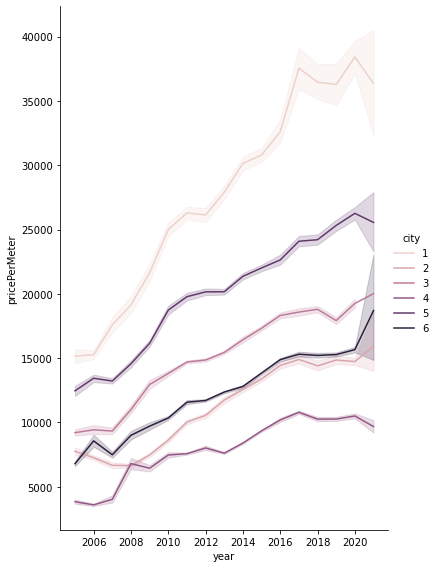

In [16]:
sns.relplot(data=df_copy, x="year", y="pricePerMeter", hue="city",kind="line", height=8, aspect=.7)


 # dealing with outliers


Displays a plot that shows the amount of exceptions in the price Per Meter column

<AxesSubplot:xlabel='pricePerMeter'>

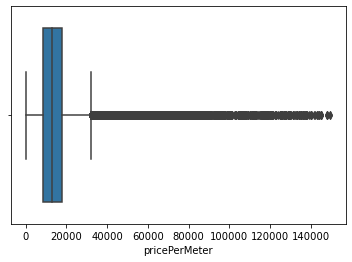

In [17]:
sns.boxplot(df_copy.pricePerMeter)

Using the interquartile range method, often referred to as "IQR", is a way to measure the mean 50% spread of a data set. 

This is calculated as the difference between the first quarter * (25th percentile)
                                                and the third quarter (75th percentile) of a data set.
                                                
Also returns to us the amount of exceptions we have in the dataframe.


In [18]:
Q1=np.percentile(df_copy["pricePerMeter"],25)
Q3=np.percentile(df_copy["pricePerMeter"],75)
IQR=Q3-Q1
# שמירת האינדקסים של החריגים באופן הבא:
price_Outliers=df_copy[(df_copy["pricePerMeter"]<Q1-1.5*IQR)|(df_copy["pricePerMeter"]>Q3+1.5*IQR)].index
# index-מאפשרת לנו לקבל אינדקסים של השורות עם החריגים במקום וקטור בוליאני
len(price_Outliers)
# len-כמה חריגים יש 


10436

Using the describe() method to displays to us the price Per Meter summary.

In [19]:
df_copy["pricePerMeter"].describe()

count    216034.000000
mean      14775.937500
std        9964.374023
min          75.000000
25%        8600.000000
50%       12740.000000
75%       18000.000000
max      149572.000000
Name: pricePerMeter, dtype: float64

Convert the abnormal data in the price Per Meter column to nan.

In [20]:
df_copy["pricePerMeter"][(df_copy["pricePerMeter"] < Q1 - 1.5*IQR) | (df_copy["pricePerMeter"] > Q3 + 1.5*IQR)] = np.nan

Using the info () method to print information about the price of the column per meter, show us if there is a nan in the column.

In [21]:
df_copy.isnull().sum()

city                 0
rooms                0
size                 0
floor                0
price                0
pricePerMeter    10436
buildDate            0
year                 0
dtype: int64

Delete missing data from the price Per Meter column.

In [22]:
df_copy.dropna(subset=['pricePerMeter'], inplace=True) 

# The first machine learning

#        The prediction part

We used the linear regression model.

use the LinearRegression() class and train the model using it's fit function.

At first we divided the dataframe by cities.
i is the numbers of the cities.

We then chose the X to be the entire dataframe without the desired column, the pricePerMeter column and the y to be the desired column, pricePerMeter.

We used the train_test_split () method to split the arrays or matrices into random trains and sub-tests.

We added y_pred and y_test as columns in X_test, in order to display this column data as a plot.

We used the metrics.mean_squared_error () method to calculate the average error squared between labels and predictions and printed it.

We used the metrics.r2_score() method to evaluate the performance of a linear regression model. It is used to test how well-observed results are reproduced by the model, depending on the ratio of the total deviation of the results described by the model.

We have created a new dataframe containing the year columns, price per meter and price prediction per meter.

We have presented the plots of the prediction for each area / city over the years using the relplot method belonging to the seaborn module.


City : 1
(5073, 9)
mse: 10285557.367419373
r^2: 0.8168899505497346
R2: 0.7772796015958711
City : 2
(6494, 9)
mse: 4158643.9630113915
r^2: 0.8325974077925945
R2: 0.8241153190235321
City : 3
(7915, 9)
mse: 3191701.3762857146
r^2: 0.834784698103286
R2: 0.8264590542079642
City : 4
(10009, 9)
mse: 3141425.369860578
r^2: 0.6786033068752018
R2: 0.6726760060083739
City : 5
(11544, 9)
mse: 7481483.435620376
r^2: 0.8027333522713229
R2: 0.8394529853050909
City : 6
(10367, 9)
mse: 3194099.6300362237
r^2: 0.8100047326419767
R2: 0.8064949806305308


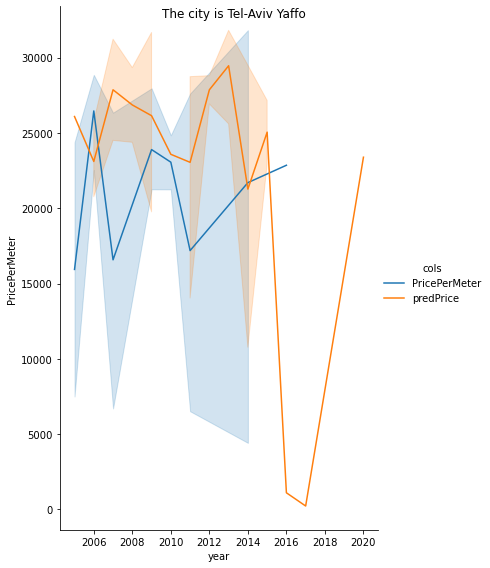

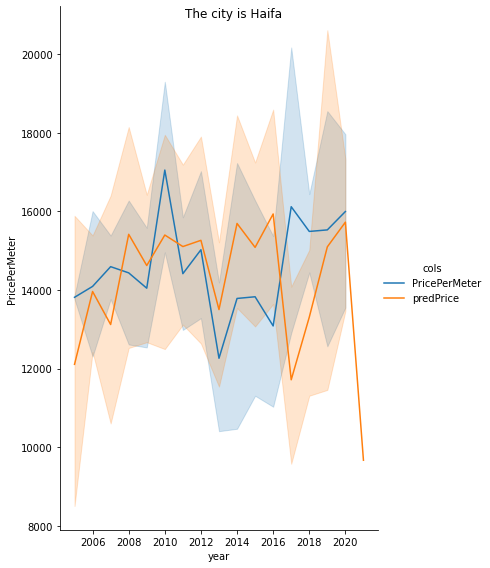

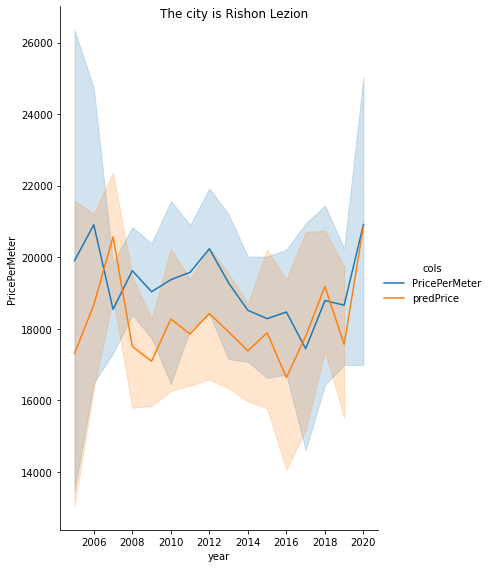

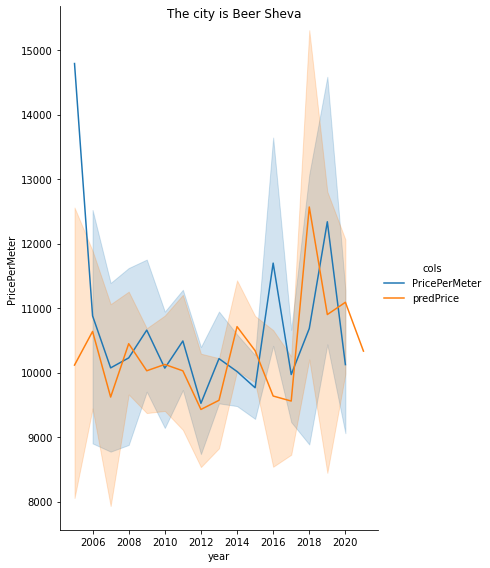

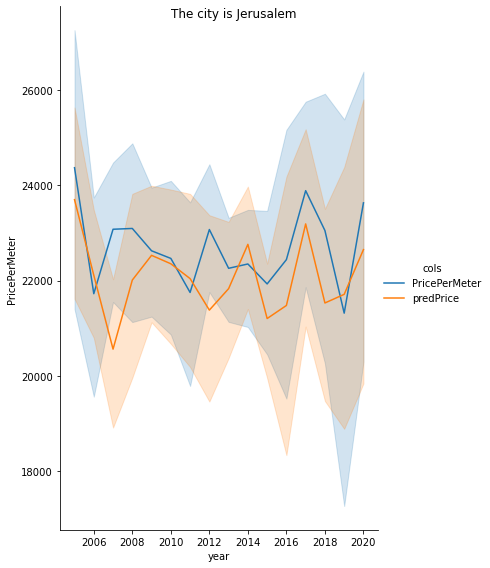

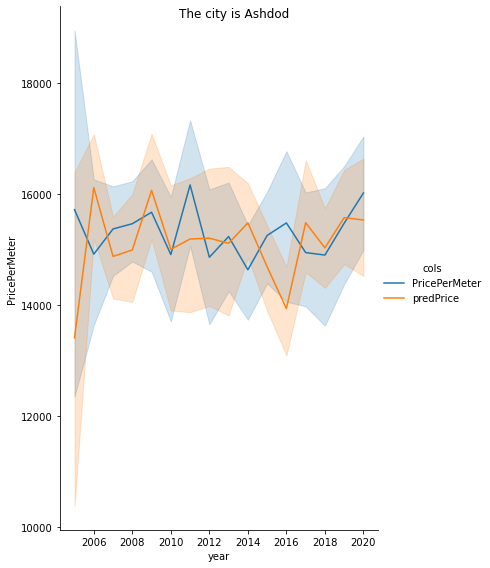

In [23]:

for i in range(1,7):
    df_new_i = df_copy.loc[df_copy["city"] == i]
    df_new_i = df_new_i.sort_values(by='year')

    y_i = pd.DataFrame(df_new_i['pricePerMeter'])
    X_i = pd.DataFrame(df_new_i.drop(['pricePerMeter'], axis = 1))

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i )

    linear = LinearRegression(fit_intercept=False)
    linear.fit(X_train_i, y_train_i)
    y_pred_i = linear.predict(X_test_i)
    
    #y_pred = pd.DataFrame(y_pred)
    
#     x_test_year = list(X_test_i['year'])

    X_test_i['predPrice'] = y_pred_i
    X_test_i['PricePerMeter'] = y_test_i
    
    print("City : "+str(i))
    print(X_test_i.shape)
    print(f"mse: {metrics.mean_squared_error(y_test_i,y_pred_i)}")
    print(f"r^2: {metrics.r2_score(y_test_i,y_pred_i)}")
    print("R2:",linear.score(X_i,y_i))
    
    X_test_i = X_test_i[["year", "PricePerMeter", "predPrice"]]
    dfm = X_test_i.melt('year',var_name='cols', value_name='vals')
    
    
    g = sns.relplot(data=dfm,  x="year", y=X_test_i['PricePerMeter'], hue='cols',kind="line", height=8, aspect=.7).set_titles(i)

    if(i==1):
        city="Tel-Aviv Yaffo"
    elif(i==2):
        city="Haifa"
    elif(i==3):
        city="Rishon Lezion"
    elif(i==4):
        city="Beer Sheva"
    elif(i==5):
        city="Jerusalem"
    elif(i==6):
        city="Ashdod"
    g.fig.suptitle("The city is "+city)



# The second machine learning

We used the corr () method to find the even correlation between the floor column and the housing price column.

We displayed the connection using the DataFrame.style property.

In [24]:
#FIND CORRELATION BETWEEN PRICE AND FLOOR
correlation = df_copy['floor'].corr(df_copy['pricePerMeter'])
corr = df_copy.corr()
corr.style.background_gradient(cmap='coolwarm')
#correlation


,city,rooms,size,floor,price,pricePerMeter,buildDate,year
city,1.000000,0.141276,0.134068,0.024425,0.022241,-0.069029,0.156659,0.122405
rooms,0.141276,1.000000,0.777240,0.197430,0.528260,-0.000216,0.343355,0.088224
size,0.134068,0.777240,1.000000,0.256641,0.597698,-0.034934,0.373867,0.110060
floor,0.024425,0.197430,0.256641,1.000000,0.252417,0.069724,0.306748,0.064755
price,0.022241,0.528260,0.597698,0.252417,1.000000,0.693908,0.376356,0.319047
pricePerMeter,-0.069029,-0.000216,-0.034934,0.069724,0.693908,1.000000,0.167556,0.343312
buildDate,0.156659,0.343355,0.373867,0.306748,0.376356,0.167556,1.000000,0.170076
year,0.122405,0.088224,0.110060,0.064755,0.319047,0.343312,0.170076,1.000000


Displays the relationship between the floor column and the price per meter column using relplot.

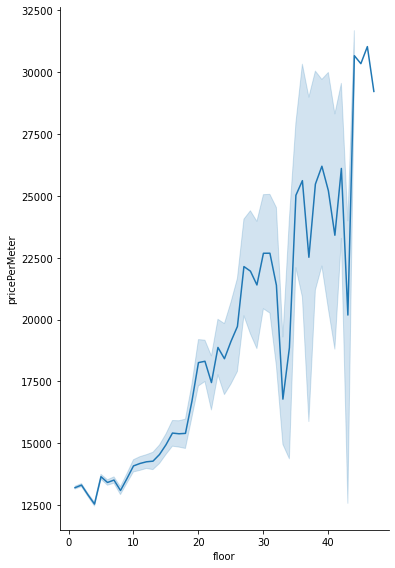

In [25]:
sns.relplot(data=df_copy, x="floor", y="pricePerMeter", kind="line", height=8, aspect=.7)


# The third machine learning

#        The prediction part


We used the linear regression model.

use the LinearRegression() class and train the model using it's fit function.

We then chose the X to be the entire dataframe without the desired column, the pricePerMeter column and the y to be the desired column, pricePerMeter.

We used the train_test_split () method to split the arrays or matrices into random trains and sub-tests.
We chose train_size to be 0.966698 to predict the years in which the covid occurred.

We added y_pred and y_test as columns in X_test, in order to display this column data as a plot.

We used the metrics.mean_squared_error () method to calculate the average error squared between labels and predictions and printed it.

We used the metrics.r2_score() method to evaluate the performance of a linear regression model. It is used to test how well-observed results are reproduced by the model, depending on the ratio of the total deviation of the results described by the model.

We have created a new dataframe containing the year columns, price per meter and price prediction per meter.

We presented the prediction of housing prices in covid time compared to the real price in covid time in the relplot method belonging to the seaborn module.


y_pred
(6847, 9)
mse: 9354601.180994932
r^2: 0.7271383194067842
R2: 0.802936354979703


Text(0.5, 0.98, 'prediction for covid')

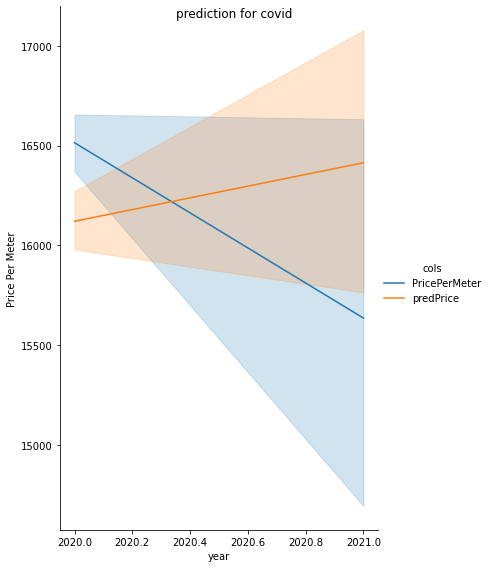

In [27]:

df_copy = df_copy.sort_values(by='year')

y = pd.DataFrame(df_copy['pricePerMeter'])
X = pd.DataFrame(df_copy.drop(['pricePerMeter'], axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.966698,shuffle=False)
# print(X_train)
# print(X_test)
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)
print("y_pred")
y_pred = pd.DataFrame(y_pred)
y_pred

x_test_year = list(X_test['year'])
X_test['predPrice'] = y_pred
X_test['PricePerMeter'] = y_test

print(X_test.shape)
print(f"mse: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"r^2: {metrics.r2_score(y_test,y_pred)}")
print("R2:",linear.score(X,y))

X_test = X_test[["year", "PricePerMeter", "predPrice"]]
dfm = X_test.melt('year',var_name='cols', value_name='Price Per Meter')
g = sns.relplot(data=dfm,  x="year", y='Price Per Meter', hue='cols',kind="line", height=8, aspect=.7).set_titles(i)
g.fig.suptitle("prediction for covid")

